<a href="https://colab.research.google.com/github/pedrohp09/Machine-Learning/blob/main/Exerc%C3%ADcio_15_Cria%C3%A7%C3%A3o_de_um_Pipeline_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Emerson Cristhian de Melo Pereira Lista de Exercícios da disciplina de Machine Learning Exercício 15


Criação de um Pipeline de Machine Learning

Crie um pipeline de machine learning que inclua pré-processamento, PCA, e um modelo de classificação. Utilize a biblioteca Scikit-Learn e avalie a performance do pipeline com validação cruzada.


In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Criar o pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Pré-processamento: escalonamento dos dados
    ('pca', PCA(n_components=2)),        # PCA para redução de dimensionalidade
    ('classifier', LogisticRegression())  # Classificador: Regressão Logística
])


In [26]:
# Avaliar o pipeline com validação cruzada
scores = cross_val_score(pipeline, X_train, y_train, cv=5)  # Usando validação cruzada com 5 folds
print(f'Accuracy média da validação cruzada: {scores.mean():.4f}')
print(f'Precisão em cada fold: {scores}')

Accuracy média da validação cruzada: 0.9048
Precisão em cada fold: [1.         0.9047619  0.80952381 1.         0.80952381]


In [27]:
# Treinar o pipeline com os dados de treino e fazer previsões no conjunto de teste
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Avaliar a acurácia do modelo no conjunto de teste
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.4f}')

Acurácia no conjunto de teste: 0.9111


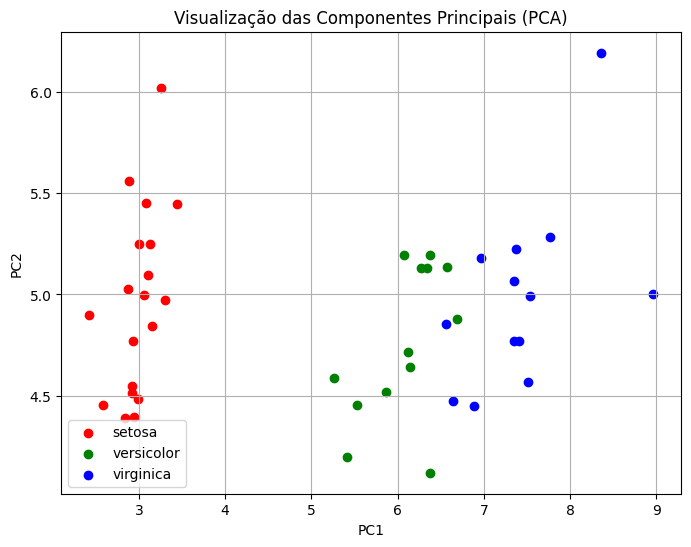

In [28]:
# Visualizar as amostras projetadas nas 2 principais componentes (PCA)
X_pca = pipeline.named_steps['pca'].transform(X_test)
plt.figure(figsize=(8, 6))
for class_label, color in zip(np.unique(y_test), ['red', 'green', 'blue']):
    plt.scatter(X_pca[y_test == class_label, 0], X_pca[y_test == class_label, 1],
                label=iris.target_names[class_label], color=color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualização das Componentes Principais (PCA)')
plt.legend()
plt.grid(True)
plt.show()